Founction for show images.  
定义显示图片的函数.  

In [1]:
import matplotlib.pyplot as plt
def displayImages(images, title=None):
    fig = plt.figure(figsize=(4*len(images),3))
    for i in range(len(images)):
        a=fig.add_subplot(1,len(images),i+1)
        plt.imshow(images[i],cmap='gray')
        if title is not None:
            a.set_title(title[i])
    return fig

Open an image.
打开图片.

(256, 256)


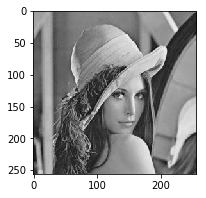

In [2]:
import numpy as np
from PIL import Image
ori = Image.open('../img/lena.png').convert('L')
ori_np = np.array(ori)
print(ori_np.shape)
displayImages([ori_np])

DFT,IDFT.

In [3]:
def dft(seq):
    N = len(seq)
    n = np.arange(N,dtype=np.complex).reshape(1,N)
    nk = n * n.reshape(N,1)
    W = np.exp(-1j * 2 * np.pi / N * nk)
    left_fourier = np.dot(W,seq)
    center_fourier = np.append(left_fourier[N//2:N],left_fourier[0:N//2],axis=0)
    return center_fourier

def idft(seq):
    N = len(seq)
    seq = np.append(seq[N - N//2:N],seq[0:N - N//2],axis=0)
    n = np.arange(N,dtype=np.complex).reshape(1,N)
    nk = n * n.reshape(N,1)
    W = np.exp(1j * 2 * np.pi / N * nk)
    return np.dot(W,seq) / N

def dft2(mat):
    return dft(dft(mat).transpose()).transpose()

def idft2(mat):
    return idft(idft(mat).transpose()).transpose()

FFT,IFFT.

In [4]:
def fft(seq):
    N = len(seq)
    def fft_ite(subseq):
        n = len(subseq)
        if 1 == n:
            return subseq
        even = fft_ite(subseq[0::2])
        odd = fft_ite(subseq[1::2])
        r = range(n // 2)
        W = [np.exp(-2j * np.pi * k / n) * odd[k] for k in r]
        return np.array([even[k] + W[k] for k in r] + [even[k] - W[k] for k in r])
    left_fourier = fft_ite(seq)
    center_fourier = np.append(left_fourier[N//2:N],left_fourier[0:N//2],axis=0)
    return center_fourier

def ifft(seq):
    N = len(seq)
    seq = np.append(seq[N - N//2:N],seq[0:N - N//2],axis=0)
    def ifft_ite(subseq):
        n = len(subseq)
        if 1 == n:
            return subseq
        even = ifft_ite(subseq[0::2])
        odd = ifft_ite(subseq[1::2])
        r = range(n // 2)
        W = [np.exp(2j * np.pi * k / n) * odd[k] for k in r]
        return np.array([even[k] + W[k] for k in r] + [even[k] - W[k] for k in r])
    return ifft_ite(seq) / N

def fft2(mat):
    return fft(fft(mat).transpose()).transpose()

def ifft2(mat):
    return ifft(ifft(mat).transpose()).transpose()

Test DFT, FFT.

c:\python36\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


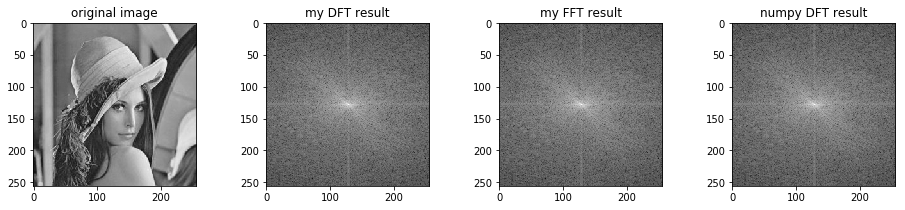

In [5]:
mydft = dft2(ori_np)
myfft = fft2(ori_np)
mydft_dsp = np.uint8(np.log(np.abs(mydft)))
myfft_dsp = np.uint8(np.log(np.abs(myfft)))
npfft_dsp = np.uint8(np.log(np.fft.fftshift(np.fft.fft2(ori_np))))
displayImages([ori_np, mydft_dsp, myfft_dsp, npfft_dsp],['original image', 'my DFT result', 'my FFT result', 'numpy DFT result'])

Test IDFT,IFFT.

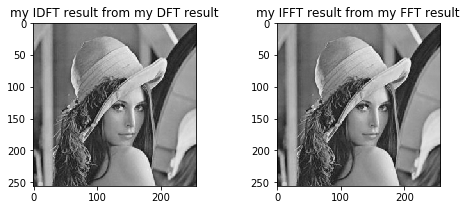

In [6]:
my_idft = idft2(mydft)
my_ifft = ifft2(myfft)
my_idft_dsp = np.uint8(np.real(my_idft))
my_ifft_dsp = np.uint8(np.real(my_ifft))
displayImages([my_idft_dsp, my_ifft_dsp],['my IDFT result from my DFT result','my IFFT result from my FFT result'])